<a href="https://colab.research.google.com/github/webstarO/CovidEDA/blob/main/CovidEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import the necessary tools for your analysis**



In [1]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=0560995d717032681fd76659c729a89ce42869dad6e70483c85c53f452c66e78
  Stored in directory: /root/.cache/pip/wheels/d5/1a/3e/6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [2]:
#this will import all modules
import pyforest

In [3]:
import pandas as pd

**Bring your data into the notebook. Describe the data to view summary**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/owid-covid-data.csv')

**Check up top 5 rows**

In [5]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
#remove all null values
df.isnull().sum()

iso_code                                        0
continent                                   14688
location                                        0
date                                            0
total_cases                                 14548
                                            ...  
population                                   1122
excess_mortality_cumulative_absolute       252923
excess_mortality_cumulative                252923
excess_mortality                           252923
excess_mortality_cumulative_per_million    252923
Length: 67, dtype: int64

In [7]:
df1 = df.dropna()

In [8]:
print(df1)

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, n

In [9]:
continent = df.groupby("continent")

In [10]:
print(continent)

In [11]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261730 entries, 0 to 261729
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    261730 non-null  object 
 1   continent                                   247042 non-null  object 
 2   location                                    261730 non-null  object 
 3   date                                        261730 non-null  object 
 4   total_cases                                 247182 non-null  float64
 5   new_cases                                   246860 non-null  float64
 6   new_cases_smoothed                          245656 non-null  float64
 7   total_deaths                                227457 non-null  float64
 8   new_deaths                                  227368 non-null  float64
 9   new_deaths_smoothed                         226182 non-null  float64
 

In [12]:
#data types
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.471820e+05,2.468600e+05,2.456560e+05,2.274570e+05,227368.000000,226182.000000,246060.000000,245738.000000,244539.000000,226348.000000,...,157395.000000,103780.000000,187588.000000,240265.000000,205659.000000,2.606080e+05,8.807000e+03,8807.000000,8807.000000,8807.000000
mean,5.384986e+06,1.167321e+04,1.172018e+04,8.052034e+04,125.673397,126.234794,75083.484988,175.987819,176.583097,760.064887,...,32.821984,50.889167,3.088983,73.595397,0.724512,1.405100e+08,5.315074e+04,10.310701,13.967308,1524.602805
std,3.304079e+07,8.156610e+04,7.929066e+04,4.098317e+05,732.523501,679.000930,125962.151825,1120.504085,663.428730,1034.865353,...,13.539671,31.881922,2.551279,7.446593,0.149552,6.915909e+08,1.444128e+05,13.129721,25.736074,1856.357022
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281600
25%,5.883000e+03,0.000000e+00,4.286000e+00,1.250000e+02,0.000000,0.000000,1412.013500,0.000000,0.872000,34.921000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,9.625000e+01,1.080000,0.110000,57.300138
50%,6.271950e+04,3.500000e+01,7.542900e+01,1.365000e+03,0.000000,1.143000,14308.708500,4.500000,15.659000,253.791000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,7.425699e+03,8.030000,7.540000,953.884640
75%,6.548138e+05,8.040000e+02,9.853217e+02,1.111000e+04,11.000000,13.143000,89351.666000,82.212000,121.001500,1152.243000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.845240e+04,16.240000,19.065000,2453.471550
max,6.758607e+08,4.082893e+06,3.436564e+06,6.876859e+06,60902.000000,14860.286000,726205.264000,228872.025000,36421.827000,6446.040000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.273323e+06,76.550000,376.770000,10251.770000


In [13]:
df.isnull().sum()

iso_code                                        0
continent                                   14688
location                                        0
date                                            0
total_cases                                 14548
                                            ...  
population                                   1122
excess_mortality_cumulative_absolute       252923
excess_mortality_cumulative                252923
excess_mortality                           252923
excess_mortality_cumulative_per_million    252923
Length: 67, dtype: int64

In [14]:
df[['total_cases']].boxplot

<bound method boxplot_frame of         total_cases
0               5.0
1               5.0
2               5.0
3               5.0
4               5.0
...             ...
261725     263921.0
261726     264127.0
261727     264127.0
261728     264127.0
261729     264127.0

[261730 rows x 1 columns]>

<IPython.core.display.Javascript object>

<ipython-input-18-abaa1a932d16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

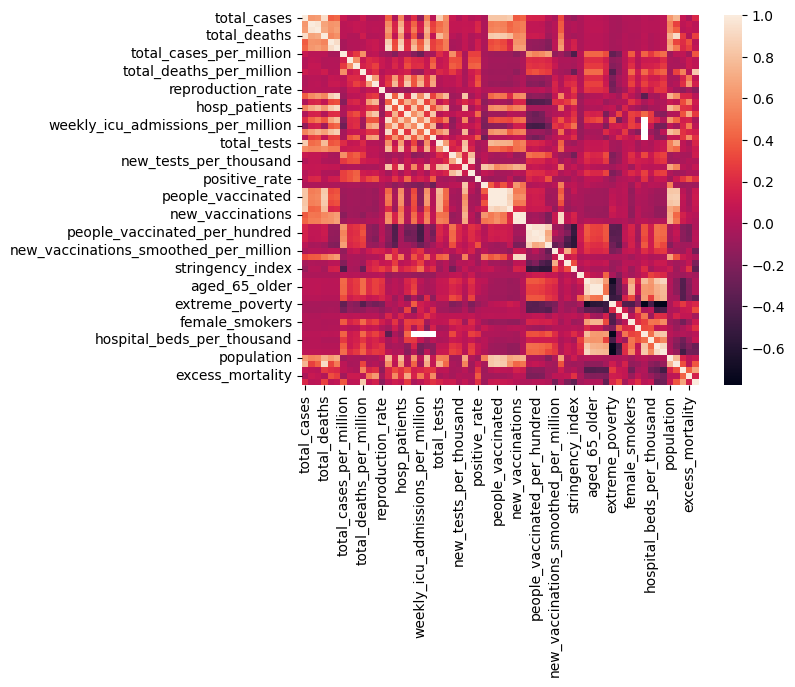

In [18]:
#correlation plot using Seaborn
sns.heatmap(df.corr())

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
# Define the target variable and the features
target = 'total_deaths'
features = ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 
            'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million',
            'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients',
            'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million',
            'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions']

In [27]:
# Drop the samples with missing values
df.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('total_deaths', axis=1), df['total_deaths'], test_size=0.3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

ValueError: ignored